# Repaso Módulo 1 - Optimización.
---

## Primer punto. Optimización de funciones escalares usando `sympy`.

**Enunciado.** Calcular **las dimensiones** del rectángulo de área máxima que puede inscribirse dentro de un semicírculo de radio 2.

Note que **las dimensiones** son base $b = 2x$ y altura $h = y$. Ver la siguiente figura.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

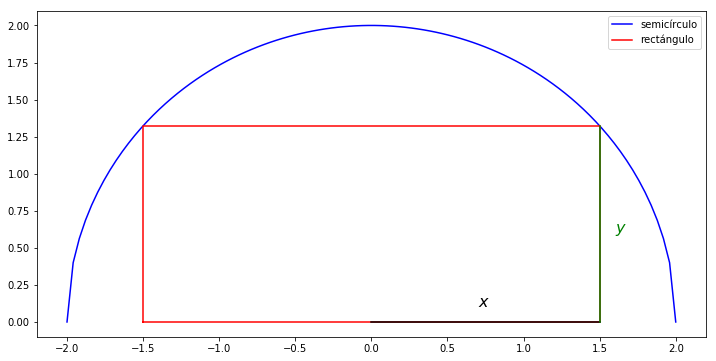

In [2]:
x = np.linspace(-2, 2, 100)
y = np.sqrt(4 - x**2)

xr = [-1.5, -1.5, 1.5, 1.5, -1.5]
yr = [0, np.sqrt(4 - 1.5**2), np.sqrt(4 - 1.5**2), 0, 0]

xx = [0, 1.5]
yx = [0, 0]

xy = [1.5, 1.5]
yy = [0, np.sqrt(4 - 1.5**2)]

plt.figure(figsize = (12, 6))
plt.plot(x, y, 'b', label = 'semicírculo')
plt.plot(xr, yr, 'r', label = 'rectángulo')
plt.plot(xx, yx, 'k')
plt.plot(xy, yy, 'g')
plt.text(0.7, 0.1, '$x$', fontsize = 16)
plt.text(1.6, 0.6, '$y$', fontsize = 16, color = 'g')
plt.legend(loc = 'best')
plt.show()

**Punto 1.** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido.

Realice este punto usando fórmulas en $\LaTeX$, en celdas Markdown.

Solución:

Se desea maximizar el área del rectángulo. $ A_R(x)$

El área del rectángulo $ A_R(x) = b h $ donde ya habíamos definido que la base es $b = 2x$ y la altura es $h = y$

$$ A_R(x)= (2x)(y)$$

Ecuación de un círculo:
$$ x^2 + y^2 = r^2 $$

$ r = 2 $

$$ x^2 + y^2 = 2^2 $$

$$ y = \sqrt{2^2 - x^2}$$



$$ A_R(x)= (2x)(\sqrt{2^2 - x^2})$$

**Punto 2.** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

In [1]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sp

In [3]:
# Definir la variable simbólica y la función objetivo
x = sp.var("x", real=True)
def AR(x) :
    return 2*x*(4-x**2)**0.5
AR(x)

2*x*(4 - x**2)**0.5

In [4]:
# Encontrar puntos críticos
dAR = sp.diff(AR(x), x)
pc = sp.solve(dAR, x)
pc

[-1.41421356237310, 1.41421356237310]

In [5]:
punto_critico = pc[1]

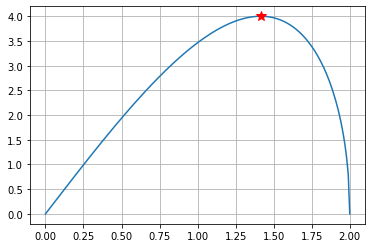

In [6]:
xn = np.linspace(0, 2, 200)
yn = AR(xn)
plt.figure()
plt.plot(xn, yn)
plt.plot(punto_critico, AR(punto_critico), "*r", ms=10)
plt.grid()

**Punto 3.** ¿Cuáles son las dimensiones $b$ y $h$ del rectángulo resultante?

In [7]:
# ecuación de la base b = 2*x
2*punto_critico

2.82842712474619

In [11]:
# ecucación de la altura respecto a x (r^2 - x^2)^(1/2)
(4 - punto_critico**2)**0.5

1.41421356237309

In [13]:
AR(punto_critico)

4.00000000000000

## Segundo punto. Programación lineal.

**Enunciado.** Considere un restaurante que abre los siete días de la semana. Con base en la experiencia, el mínimo número de trabajadores necesarios en cada día de la semana es:

In [10]:
import pandas as pd

In [4]:
df = pd.DataFrame(columns=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], index = ['Num_trabajadores'])
df.loc['Num_trabajadores', :] = [14, 13, 15, 16, 19, 18, 11]
df

,Lunes,Martes,Miercoles,Jueves,Viernes,Sábado,Domingo
Num_trabajadores,14,13,15,16,19,18,11


Cada trabajador labora cinco días consecutivos, y luego descansa dos, repitiendo este patrón indefinidamente. Se debe minimizar la cantidad de trabajadores totales en el restaurante.

*Definición de variables*: enumeramos los días del uno al siete (Lunes - 1, Martes - 2, ..., Domingo - 7). Sea $x_i$ el número de trabajadores que empieza su turno de cinco días el día $i$.

**Punto 1.** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).

Solución:

Se desea minimizar el total de trabajadores, es decir $ x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 $

Sabiendo que cada trabajador labora cinco días seguidos, los trabajadores que inician laborando el lunes, continúan trabajando hasta el viernes, acumulándose con los que inician martes, miércoles, jueves y viernes.


$$ Personas_{viernes} =   x_1 + x_2 + x_3 + x_4 + x_5 $$
$$ Personas_{sábado} =    x_2 + x_3 + x_4 + x_5 + x_6 $$
$$ Personas_{domingo} =   x_3 + x_4 + x_5 + x_6 + x_7 $$
$$ Personas_{lunes} =     x_4 + x_5 + x_6 + x_7 + x_1 $$
$$ Personas_{martes} =    x_5 + x_6 + x_7 + x_1 + x_2 $$
$$ Personas_{miércoles} = x_6 + x_7 + x_1 + x_2 + x_3 $$
$$ Personas_{jueves} =    x_7 + x_1 + x_2 + x_3 + x_4 $$


Ordenamos para facilitar escribir la matriz de restricciones

$$ Viernes:  x_1 + x_2 + x_3 + x_4 + x_5 \geq 19 $$
$$ Sábado: x_2 + x_3 + x_4 + x_5 + x_6 \geq 18 $$
$$ Domingo: x_3 + x_4 + x_5 + x_6 + x_7 \geq 11 $$
$$ Lunes: x_1 + x_4 + x_5 + x_6 + x_7 \geq 14 $$
$$ Martes: x_1 + x_2 + x_5 + x_6 + x_7 \geq 13 $$
$$ Miércoles: x_1 + x_2 + x_3 + x_6 + x_7 \geq 15 $$
$$ Jueves: x_1 + x_2 + x_3 + x_4 + x_7 \geq 16 $$


Reescribimos a $\leq$ para algoritmo

$$ Viernes:  - x_1 - x_2 - x_3 - x_4 - x_5 + 0x_6 \leq -19 $$
$$ Sábado:   - x_2 - x_3 - x_4 - x_5 - x_6 \leq -18 $$
$$ Domingo:  - x_3 - x_4 - x_5 - x_6 - x_7 \leq -11 $$
$$ Lunes:    - x_1 - x_4 - x_5 - x_6 - x_7 \leq -14 $$
$$ Martes:   - x_1 - x_2 - x_5 - x_6 - x_7 \leq -13 $$
$$ Miércoles:- x_1 - x_2 - x_3 - x_6 - x_7 \leq -15 $$
$$ Jueves:   - x_1 - x_2 - x_3 - x_4 - x_7 \leq -16 $$


**Punto 2.** Resuelva el problema utilizando la función `linprog`. ¿Cuántos trabajadores son necesarios en total?

In [16]:
import scipy.optimize as opt
import numpy as np

c = np.array([1, # x1
              1, # x2
              1, # x3
              1, # x4
              1, # x5
              1, # x6
              1])# x7

# el orden de los renglones de c debe hacer match con las columnas de A

            #  x1, x2, x3, x4, x5, x6, x7
A = np.array([[-1, -1, -1, -1, -1,  0,  0], # Viernes
              [ 0, -1, -1, -1, -1, -1,  0], # Sábado
              [ 0,  0, -1, -1, -1, -1, -1], # Domingo
              [-1,  0,  0, -1, -1, -1, -1], # Lunes
              [-1, -1,  0,  0, -1, -1, -1], # Martes
              [-1, -1, -1,  0,  0, -1, -1], # Miércoles
              [-1, -1, -1, -1,  0,  0, -1]  # Jueves
             ])

# el orden de los renglones de A debe hacer match con los renglones de b

b = np.array([-19, # Viernes
              -18, # Sábado
              -11, # Domingo
              -14, # Lunes
              -13, # Martes
              -15, # Miércoles
              -16  # Jueves
             ])

In [18]:
sol = opt.linprog(c, A, b, method="simplex")
sol

     con: array([], dtype=float64)
     fun: 22.0
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([0., 0., 4., 0., 0., 0., 0.])
  status: 0
 success: True
       x: array([4., 3., 5., 4., 3., 3., 0.])

In [21]:
np.sum(sol.x)

22.0

In [20]:
A @ sol.x

array([-19., -18., -15., -14., -13., -15., -16.])

## Tercer punto. Ajuste de curvas.

**Enunciado**. El archivo `Salarios_minimos.csv` contiene datos simplificados de los salarios mínimos desde 1986 a la fecha. La primer columna corresponde a los años, la segunda a dichos salarios. La información completa se encuentra en

https://idconline.mx/laboral/salarios-minimos/salarios-minimos-1986-2007.

**Punto 1.** Importar los datos en un DataFrame de pandas.

In [24]:
import pandas as pd
data = pd.read_csv("Salarios_minimos.csv")
data.head()

,Periodo,Salario
0,1988.25,8.00
1,1989.00,8.64
2,1989.50,9.16
3,1990.00,10.08
4,1990.84,11.90


In [35]:
min(x)

0.25

In [34]:
max(x)

30.0

**Punto 2.** Usando los años como variable independiente $x$ y los salarios mínimos como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos del archivo contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

#### Parte 1. Regresión Lineal

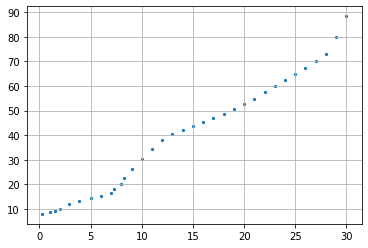

In [25]:
import matplotlib.pyplot as plt

x = data["Periodo"] - 1988
y = data["Salario"]
plt.figure()
plt.scatter(x, y, s=5)
plt.grid()

In [27]:
import scipy.optimize as opt

def funcion_de_costo_1(theta, x, y) :
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
sol = opt.minimize(funcion_de_costo_1,
                   theta_inicial_1,
                   args=(x, y))
costo_1 = sol.fun
resultados_1 = sol.x
sol

      fun: 276.88722086932114
 hess_inv: array([[ 0.05133885, -0.00258391],
       [-0.00258391,  0.00018226]])
      jac: array([-3.81469727e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([3.71557804, 2.52832883])

In [28]:
def funcion_de_costo_2(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
sol = opt.minimize(funcion_de_costo_2,
                   theta_inicial_2,
                   args=(x, y))
costo_2 = sol.fun
resultados_2 = sol.x
sol

      fun: 258.55443749584754
 hess_inv: array([[ 5.65420568e-02,  1.67247103e-04, -1.56935993e-04],
       [ 1.67247103e-04,  6.82560827e-05, -4.02911351e-06],
       [-1.56935993e-04, -4.02911351e-06,  7.59917419e-07]])
      jac: array([0.00000000e+00, 0.00000000e+00, 3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 235
      nit: 11
     njev: 58
   status: 0
  success: True
        x: array([5.16416912, 2.21902905, 0.01042461])

In [32]:
def funcion_de_costo_3(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
sol = opt.minimize(funcion_de_costo_3,
                   theta_inicial_3,
                   args=(x, y))
costo_3 = sol.fun
resultados_3 = sol.x
sol

      fun: 254.08498937158998
 hess_inv: array([[ 1.77670113e-01, -4.47156573e-02,  2.97595251e-03,
        -5.75017418e-05],
       [-4.47156573e-02,  1.57397600e-02, -1.19789843e-03,
         2.48917515e-05],
       [ 2.97595251e-03, -1.19789843e-03,  9.81121813e-05,
        -2.13378127e-06],
       [-5.75017418e-05,  2.48917515e-05, -2.13378127e-06,
         4.78518954e-08]])
      jac: array([ 0.00000000e+00,  0.00000000e+00, -3.81469727e-06,  1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 482
      nit: 9
     njev: 94
   status: 2
  success: False
        x: array([ 4.38105194e+00,  2.55802797e+00, -1.86352057e-02,  6.51692238e-04])

#### Parte 2. Graficar polinomios

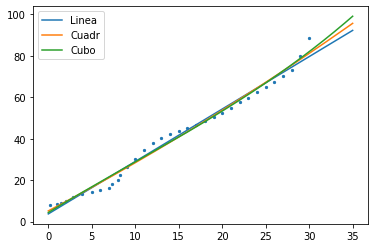

In [40]:
xn = np.linspace(0, 35, 200)
yn1 = resultados_1[0] + resultados_1[1]*xn
yn2 = resultados_2[0] + resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0] + resultados_3[1]*xn + resultados_3[2]*xn**2 + resultados_3[3]*xn**3

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x, y, s=5)
plt.plot(xn, yn1, label="Linea")
plt.plot(xn, yn2, label="Cuadr")
plt.plot(xn, yn3, label="Cubo")
plt.legend(loc="best")

#### Parte 3. Graficar error cuadrático contra número de términos

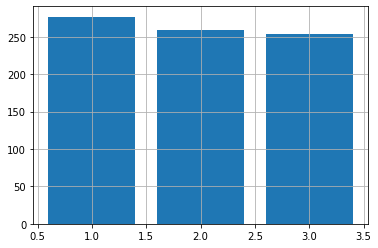

In [50]:
plt.figure()
plt.bar([1, 2, 3], [costo_1, costo_2, costo_3])
plt.grid()

**Punto 3.** Con los polinomios ajustados en el punto anterior, estime el salario mínimo en el año 2019 y compare con el dato real 102.68.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

In [51]:
x2019 = 2019 - 1988

pred1 = resultados_1[0] + resultados_1[1]*x2019
pred2 = resultados_2[0] + resultados_2[1]*x2019 + resultados_2[2]*x2019**2
pred3 = resultados_3[0] + resultados_3[1]*x2019 + resultados_3[2]*x2019**2 + resultados_3[3]*x2019**3

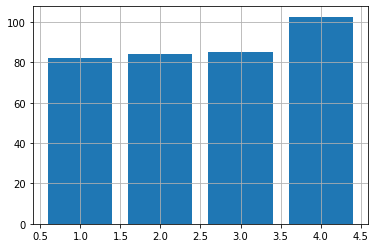

In [52]:
plt.figure()
plt.bar([1, 2, 3, 4], [pred1, pred2, pred3, 102.68])
plt.grid()

In [55]:
pred3

85.18604973489202

In [56]:
data

,Periodo,Salario
0,1988.25,8.00
1,1989.00,8.64
2,1989.50,9.16
3,1990.00,10.08
4,1990.84,11.90
5,1991.84,13.33
6,1993.00,14.27
7,1994.00,15.27
8,1995.00,16.34
9,1995.30,18.30
